In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.api.types import is_numeric_dtype
import warnings
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler , LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier,GradientBoostingClassifier,VotingClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.feature_selection import RFE
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from tabulate import tabulate
import itertools

In [2]:
train=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Train_data.csv")
test=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Test_data.csv")

In [3]:
train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [4]:
train.tail()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
25187,0,tcp,exec,RSTO,0,0,0,0,0,0,...,7,0.03,0.06,0.00,0.00,0.0,0.0,1.0,1.0,anomaly
25188,0,tcp,ftp_data,SF,334,0,0,0,0,0,...,39,1.00,0.00,1.00,0.18,0.0,0.0,0.0,0.0,anomaly
25189,0,tcp,private,REJ,0,0,0,0,0,0,...,13,0.05,0.07,0.00,0.00,0.0,0.0,1.0,1.0,anomaly
25190,0,tcp,nnsp,S0,0,0,0,0,0,0,...,20,0.08,0.06,0.00,0.00,1.0,1.0,0.0,0.0,anomaly
25191,0,tcp,finger,S0,0,0,0,0,0,0,...,49,0.19,0.03,0.01,0.00,1.0,1.0,0.0,0.0,anomaly


In [5]:
train["class"].unique()


array(['normal', 'anomaly'], dtype=object)

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     25192 non-null  int64  
 1   protocol_type                25192 non-null  object 
 2   service                      25192 non-null  object 
 3   flag                         25192 non-null  object 
 4   src_bytes                    25192 non-null  int64  
 5   dst_bytes                    25192 non-null  int64  
 6   land                         25192 non-null  int64  
 7   wrong_fragment               25192 non-null  int64  
 8   urgent                       25192 non-null  int64  
 9   hot                          25192 non-null  int64  
 10  num_failed_logins            25192 non-null  int64  
 11  logged_in                    25192 non-null  int64  
 12  num_compromised              25192 non-null  int64  
 13  root_shell      

In [7]:
train.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,25192.000000,2.519200e+04,2.519200e+04,25192.000000,25192.000000,25192.00000,25192.000000,25192.000000,25192.000000,25192.000000,...,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000
mean,305.054104,2.433063e+04,3.491847e+03,0.000079,0.023738,0.00004,0.198039,0.001191,0.394768,0.227850,...,182.532074,115.063036,0.519791,0.082539,0.147453,0.031844,0.285800,0.279846,0.117800,0.118769
std,2686.555640,2.410805e+06,8.883072e+04,0.008910,0.260221,0.00630,2.154202,0.045418,0.488811,10.417352,...,98.993895,110.646850,0.448944,0.187191,0.308367,0.110575,0.445316,0.446075,0.305869,0.317333
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,84.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,255.000000,61.000000,0.510000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.790000e+02,5.302500e+02,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42862.000000,3.817091e+08,5.151385e+06,1.000000,3.000000,1.00000,77.000000,4.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
train.describe(include=object)

,protocol_type,service,flag,class
count,25192,25192,25192,25192
unique,3,66,11,2
top,tcp,http,SF,normal
freq,20526,8003,14973,13449


In [9]:
train.shape

(25192, 42)

In [10]:
class_counts = train["class"].value_counts()
print("target value counts:\n",class_counts)

target value counts:
 class
normal     13449
anomaly    11743
Name: count, dtype: int64


In [11]:
train.isnull().sum()

,0
duration,0
protocol_type,0
service,0
flag,0
src_bytes,0
dst_bytes,0
land,0
wrong_fragment,0
urgent,0
hot,0


In [12]:
total=train.shape[0]
missing_columns = [col for col in train.columns if train[col].isnull().sum()>0]
for col in missing_columns:
  null_count = train[col].isnull().sum()
  per = (null_count/total)*100
  print(f"{col}:{null_count}({round(per,3)}%)")

In [13]:
print(f"number of duplicate rows:{train.duplicated().sum()}")

number of duplicate rows:0


<Axes: xlabel='class', ylabel='count'>

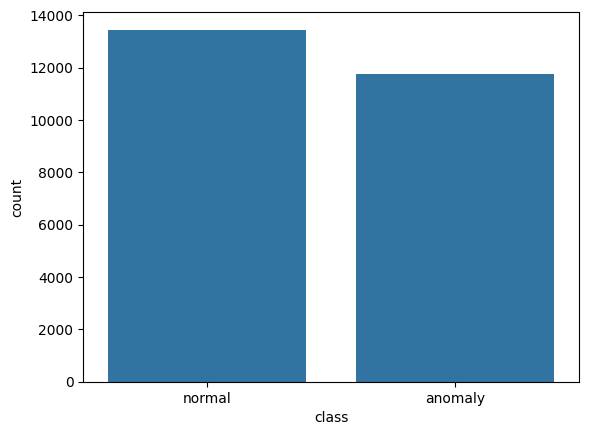

In [14]:
import seaborn as sns
sns.countplot(x=train["class"])

In [15]:
print("class distribution training set:")
print(train["class"].value_counts())

class distribution training set:
class
normal     13449
anomaly    11743
Name: count, dtype: int64


In [16]:
encoders = {}
object_cols = train.select_dtypes(include=["object"]).columns.tolist()
object_cols=[col for col in object_cols if col!="class"]
for col in object_cols:
  le = LabelEncoder()
  le.fit(pd.concat([train[col],test[col]],ignore_index=True).unique())
  train[col] = le.transform(train[col])
  test[col]=le.transform(test[col])
  encoders[col]=le

In [17]:
train.drop(["num_outbound_cmds"],axis=1,inplace=True)
test.drop(["num_outbound_cmds"],axis=1,inplace=True)
train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,1,19,9,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,2,41,9,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,1,46,5,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,1,22,9,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,1,22,9,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [18]:
X_train = train.drop(["class"],axis=1)
Y_train = train["class"]

In [19]:
rfc = RandomForestClassifier()
rfe = RFE(rfc,n_features_to_select=10)
rfe.fit(X_train,Y_train)
feature_map = [(i,v) for i, v in itertools.zip_longest(rfe.get_support(),X_train.columns)]
selected_features = [v for i,v in feature_map if i ==True]
selected_features

['protocol_type',
 'service',
 'flag',
 'src_bytes',
 'dst_bytes',
 'count',
 'same_srv_rate',
 'diff_srv_rate',
 'dst_host_same_srv_rate',
 'dst_host_same_src_port_rate']

In [20]:
X_train = X_train[selected_features]


In [21]:
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
test = scale.fit_transform(test)

In [22]:
X_train,X_test,Y_train,Y_test = train_test_split(X_train,Y_train,train_size=0.70,random_state=42)
X_train.shape

(17634, 10)

In [23]:
X_test.shape

(7558, 10)

In [24]:
Y_train.shape

(17634,)

In [25]:
Y_test.shape

(7558,)

In [26]:
import time
from sklearn.linear_model import LogisticRegression
clfl = LogisticRegression(max_iter = 1200000)
start_time = time.time()
clfl.fit(X_train,Y_train.values.ravel())
end_time = time.time()
print("training time:",end_time-start_time)

training time: 0.060367584228515625


In [27]:
start_time=time.time()
y_test_pred_l = clfl.predict(X_test)
end_time=time.time()
print("testing time:",end_time-start_time)

testing time: 0.0007205009460449219


In [28]:
lg_model = LogisticRegression(random_state=42)
lg_model.fit(X_train,Y_train)

LogisticRegression(random_state=42)

In [29]:
lg_train,lg_test=lg_model.score(X_train,Y_train),lg_model.score(X_test,Y_test)
print(f"trainig score:{lg_train}\ntesting score:{lg_test}")

trainig score:0.9407394805489395
testing score:0.9433712622386875


In [30]:
pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.9/400.9 kB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.4/247.4 kB 24.7 MB/s eta 0:00:00


In [31]:
import optuna
optuna.logging.set_verbosity(optuna.logging.WARNING)


In [32]:
def objective(trial):
  n_neighbors = trial.suggest_int("KNN_n-neighbors",2,16,log=False)
  classifier_obj = KNeighborsClassifier(n_neighbors=n_neighbors)
  classifier_obj.fit(X_train,Y_train)
  accuracy=classifier_obj.score(X_test,Y_test)
  return accuracy

In [33]:
study_knn=optuna.create_study(direction="maximize")
study_knn.optimize(objective,n_trials=1)
print(study_knn.best_trial)

FrozenTrial(number=0, state=1, values=[0.9863720560994972], datetime_start=datetime.datetime(2025, 8, 29, 6, 20, 1, 767967), datetime_complete=datetime.datetime(2025, 8, 29, 6, 20, 2, 318489), params={'KNN_n-neighbors': 6}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'KNN_n-neighbors': IntDistribution(high=16, log=False, low=2, step=1)}, trial_id=0, value=None)


In [35]:
KNN_model=KNeighborsClassifier(n_neighbors=study_knn.best_trial.params["KNN_n-neighbors"])
KNN_model.fit(X_train,Y_train)
KNN_train, KNN_test=KNN_model.score(X_train,Y_train), KNN_model.score(X_test,Y_test)
print(f"Training Score: (KNN_train)\nTesting Score:(KNN_test)")

Training Score: (KNN_train)
Testing Score:(KNN_test)


In [36]:
from sklearn.tree import DecisionTreeClassifier
clfd=DecisionTreeClassifier(criterion="entropy",max_depth=4)
start_time=time.time()
clfd.fit(X_train,Y_train.values.ravel())
end_time=time.time()
print("training time:",end_time-start_time)

training time: 0.116485595703125


In [37]:
def objective(trial):
  dt_max_depth = trial.suggest_int("DT_max_depth",2,32,log=False)
  dt_max_features = trial.suggest_int("DT_max_features",2,10,log=False)
  classifier_obj = DecisionTreeClassifier(max_depth=dt_max_depth,max_features=dt_max_features)
  classifier_obj.fit(X_train,Y_train)
  accuracy=classifier_obj.score(X_test,Y_test)
  return accuracy

In [38]:
study_dt=optuna.create_study(direction="maximize")
study_dt.optimize(objective,n_trials=1)
print(study_dt.best_trial)

FrozenTrial(number=0, state=1, values=[0.9940460439269648], datetime_start=datetime.datetime(2025, 8, 29, 6, 22, 21, 927229), datetime_complete=datetime.datetime(2025, 8, 29, 6, 22, 21, 979688), params={'DT_max_depth': 27, 'DT_max_features': 7}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'DT_max_depth': IntDistribution(high=32, log=False, low=2, step=1), 'DT_max_features': IntDistribution(high=10, log=False, low=2, step=1)}, trial_id=0, value=None)


In [39]:
dt=DecisionTreeClassifier(max_depth=study_dt.best_trial.params["DT_max_depth"],max_features=study_dt.best_trial.params["DT_max_features"])
dt.fit(X_train,Y_train)
dt_train , dt_test = dt.score(X_train,Y_train), dt.score(X_test,Y_test)
print(f"Training Score: {dt_train}\nTesting Score: {dt_test}")

Training Score: 0.9998298741068391
Testing Score: 0.9943106641968775


In [40]:
data=[["KNN", KNN_train, KNN_test],
  ["Logistic Regression", lg_train, lg_test],
  ["Decision Tree",dt_train,dt_test]]
col_names=["Model", "Train Score", "Test Score"]
print(tabulate(data, headers=col_names, tablefmt="fancy_grid"))

╒═════════════════════╤═══════════════╤══════════════╕
│ Model               │   Train Score │   Test Score │
╞═════════════════════╪═══════════════╪══════════════╡
│ KNN                 │      0.989055 │     0.986372 │
├─────────────────────┼───────────────┼──────────────┤
│ Logistic Regression │      0.940739 │     0.943371 │
├─────────────────────┼───────────────┼──────────────┤
│ Decision Tree       │      0.99983  │     0.994311 │
╘═════════════════════╧═══════════════╧══════════════╛


In [41]:
SEED=42
#Decision tree model
dtc=DecisionTreeClassifier()
#KNN
knn=KNeighborsClassifier()
#Logistic Regression model
lr=LogisticRegression()

In [42]:
from sklearn.model_selection import cross_val_score
models={}
models['LogisticRegression']=lr
models['DecisionTreeClassifier']=dtc
models['KNeighborsClassifier']=knn

In [43]:

labels_map = {0: "normal", 1: "anomaly"}
reverse_labels_map = {v: k for k, v in labels_map.items()}
model=models["DecisionTreeClassifier"]
model.fit(X_train, Y_train)
y_pred_numeric=model.predict(X_test)
y_pred = [reverse_labels_map.get(label, 1) for label in y_pred_numeric]

from sklearn.metrics import classification_report
print(classification_report(Y_test.map(reverse_labels_map), y_pred, target_names=["normal", "anomaly"]))

              precision    recall  f1-score   support

      normal       1.00      1.00      1.00      4042
     anomaly       1.00      1.00      1.00      3516

    accuracy                           1.00      7558
   macro avg       1.00      1.00      1.00      7558
weighted avg       1.00      1.00      1.00      7558



In [44]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, precision_score, recall_score
models = {}
models["LogisticRegression"] = lr
models["Decision Tree Classifier"] = dtc
models["KNeighborsClassifier"] = knn
scores = {}

precision_scorer = make_scorer(precision_score, pos_label="anomaly")
recall_scorer = make_scorer(recall_score, pos_label="anomaly")

for name in models:
    scores[name] = {}
    scores[name]["precision"] = cross_val_score(models[name], X_train, Y_train, cv = 10 , scoring=precision_scorer)
    scores[name]["recall"] = cross_val_score(models[name], X_train, Y_train, cv = 10 , scoring=recall_scorer)


def line(name):
  return (25-len (name) // 2)
for name in models:
  print(line(name), name, "Model Validation", line(name))
  for scorer in ["precision", "recall"]:
    mean = round(np.mean(scores [name] [scorer]) * 100, 2)
    stdev = round(np.std(scores [name] [scorer]) * 100, 2)
    print("Mean {}: ".format(scorer), "\n", mean, "%", "+/-", stdev)
    print()

16 LogisticRegression Model Validation 16
Mean precision:  
 95.12 % +/- 0.68

Mean recall:  
 91.93 % +/- 1.1

13 Decision Tree Classifier Model Validation 13
Mean precision:  
 99.33 % +/- 0.3

Mean recall:  
 99.44 % +/- 0.19

15 KNeighborsClassifier Model Validation 15
Mean precision:  
 98.65 % +/- 0.35

Mean recall:  
 98.29 % +/- 0.23



/tmp/ipython-input-2813261278.py:5: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  scores=pd.DataFrame(scores).swapaxes("index","columns")*100


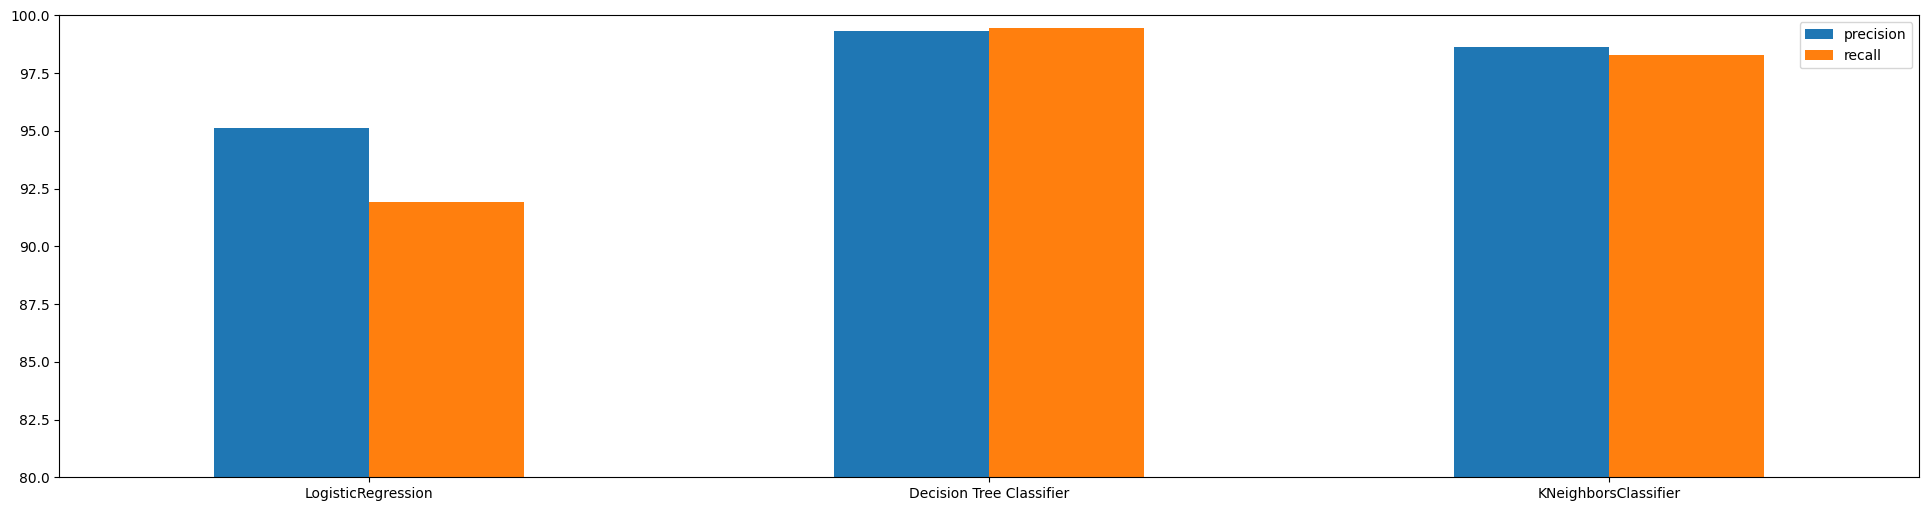

In [45]:
for name in models:
  for scorer in ["precision","recall"]:
    scores[name][scorer]=scores[name][scorer].mean()

scores=pd.DataFrame(scores).swapaxes("index","columns")*100
scores.plot(kind="bar",ylim=[80,100],figsize=(24,6),rot=0)
plt.show()

In [46]:
models= {}
models['KNeighbors Classifier']= knn
models['LogisticRegression']= lr
models['Decision Tree Classifier']= dtc

In [47]:
preds= {}
for name in models :
  models[name].fit(X_train, Y_train)
  preds[name] = models [name].predict(X_test)
print("Predictions complete.")

Predictions complete.


In [48]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score
def line(name, sym="*"):
  return sym*(25-len (name)//2)
target_names=["normal", "anamoly"]
for name in models:
  print(line (name), name, 'Model Testing', line (name))
  print(confusion_matrix(Y_test, preds [name]))
  print(line(name,'-'))
  print(classification_report (Y_test, preds [name], target_names=target_names))

*************** KNeighbors Classifier Model Testing ***************
[[3470   46]
 [  45 3997]]
---------------
              precision    recall  f1-score   support

      normal       0.99      0.99      0.99      3516
     anamoly       0.99      0.99      0.99      4042

    accuracy                           0.99      7558
   macro avg       0.99      0.99      0.99      7558
weighted avg       0.99      0.99      0.99      7558

**************** LogisticRegression Model Testing ****************
[[3261  255]
 [ 173 3869]]
----------------
              precision    recall  f1-score   support

      normal       0.95      0.93      0.94      3516
     anamoly       0.94      0.96      0.95      4042

    accuracy                           0.94      7558
   macro avg       0.94      0.94      0.94      7558
weighted avg       0.94      0.94      0.94      7558

************* Decision Tree Classifier Model Testing *************
[[3497   19]
 [  20 4022]]
-------------
              pr

<Axes: >

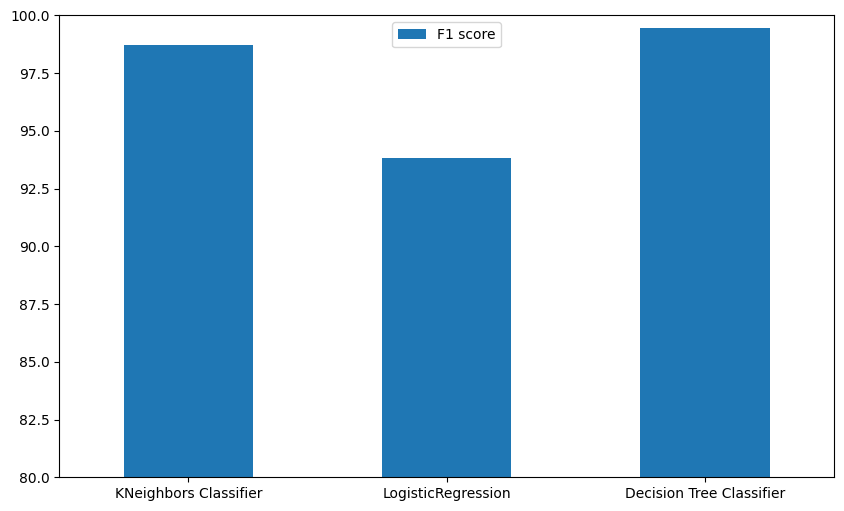

In [49]:
f1s = {}
import pandas as pd
for name in models:
 f1s[name] = f1_score(Y_test, preds[name], pos_label="anomaly")
pos_label="normal"
f1s = pd.DataFrame(f1s.values(), index=f1s.keys(), columns=["F1 score"]) * 100
f1s.plot(kind="bar", ylim=[80, 100], figsize=(10, 6), rot=0)

In [53]:
with open("intrusion_detection_model.pkl", "wb") as f:
    pickle.dump(model, f)

In [61]:
import pickle
import numpy as np

# Function to load the saved model from disk
def load_model(path='/content/intrusion_detection_model.pkl'):
    """
    Loads the trained model from a specified file path.
    Parameters:
        path: str, path to the saved model file.
    Returns:
        model: Trained model loaded from the file.
    """
    with open(path, 'rb') as f:
        model = pickle.load(f)  # Load the model using pickle
    return model

# Function to predict intrusion (normal or anomaly) based on input data
def predict_intrusion(model, input_data):
    """
    Predicts whether the input data is 'normal' or 'anomaly' using the trained model.
    Parameters:
        model: Trained model (e.g., DecisionTreeClassifier)
        input_data: array-like, shape (n_samples, n_features), data to predict on.
    Returns:
        predictions: List of predicted class labels ('normal' or 'anomaly')
    """
    # Convert input_data to numpy array if it's a list
    if isinstance(input_data, list):
        input_data = np.array(input_data)

    # Ensure input is 2D for the model (even for a single sample)
    if input_data.ndim == 1:
        input_data = input_data.reshape(1, -1)

    # Make predictions using the trained model
    predictions = model.predict(input_data)

    # Handle string predictions directly (for 'normal' or 'anomaly')
    if isinstance(predictions[0], str):
        return predictions.tolist()

    # Otherwise, convert numeric predictions to string labels (0 -> 'normal', 1 -> 'anomaly')
    labels = ['normal', 'anomaly']
    return [labels[p] for p in predictions]

# Load the saved model from disk
model = load_model()

# Example 1: New data sample (feature count must match training features!)
new_sample = [0.1, 0.3, 0.5, 0.8, 0.2, 1.0, 0.9, 0.4, 0.6, 0.7]  # Replace with actual values
result = predict_intrusion(model, new_sample)
print("Prediction:", result)


Prediction: ['normal']


In [62]:
# Example 2: Another sample with values representing a 'normal' class
new_sample = [0.25, 0.35, 0.45, 0.30, 0.40, 0.50, 0.60, 0.55, 0.48, 0.52]
result = predict_intrusion(model, new_sample)
print("Prediction:", result)

Prediction: ['normal']
